In [6]:
# imports

import torch
from IPython.display import Image

# Calculating gradients in PyTorch

In [5]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 1.3684, -0.8241, -0.4312], requires_grad=True)


In [ ]:
y = x + 2

This will create a computational graph which looks like this:

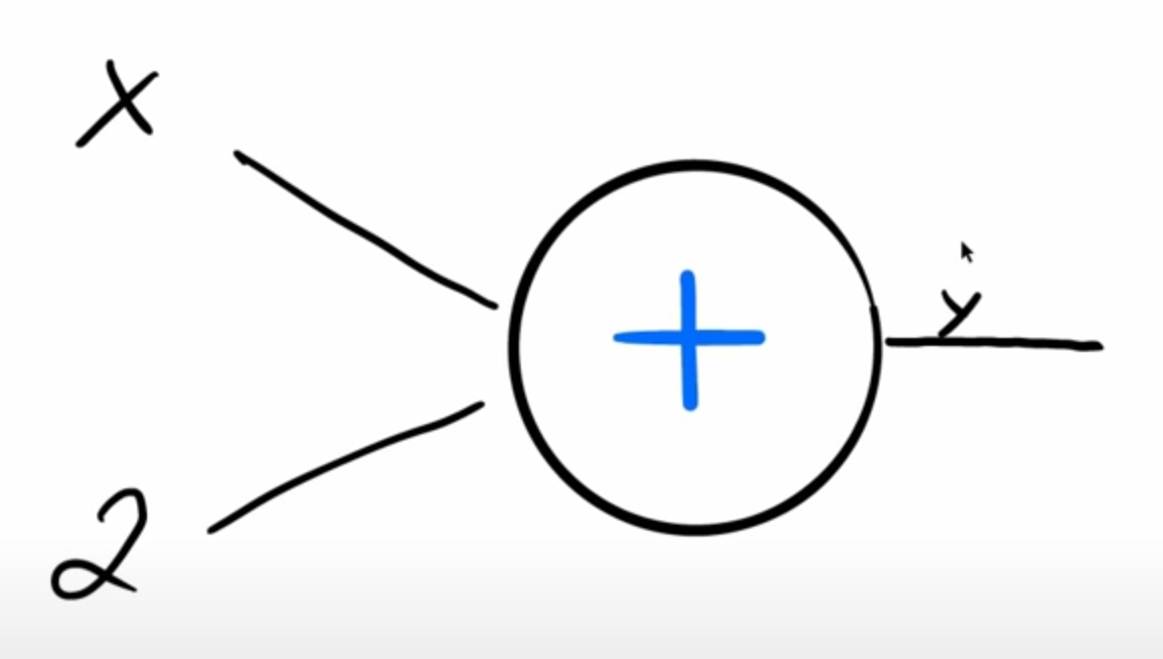

In [7]:
image_path = 'data/grad_1.png'
Image(filename=image_path)

For each operation we have a note with inputs and an output. Here the operation is addition (+), inputs are x and 2, 
output is y. Using method called backpropagation we ca calculate the gradients